In [29]:
##Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
#Read csv file
df = pd.read_csv('Resources/outliers.csv')
df[['SR Create TS', 'SR Close TS', 'CQ TS']] = df[['SR Create TS', 'SR Close TS', 'CQ TS']].astype('datetime64[ns]')

In [31]:
#Create new data with columns we're interested in
new_df = df[['OCPM #', 'Make/Miss', 'SR Create TS', 'SR Close TS', 'CQ TS']]
new_df

,OCPM #,Make/Miss,SR Create TS,SR Close TS,CQ TS
0,409G9TD,Miss,2019-11-05 09:31:00,2019-12-21 01:20:00,2019-11-05 17:08:00
1,409H6SW,Miss,2019-11-08 14:07:00,2019-12-19 11:51:00,2019-11-09 04:52:00
2,409GFVK,Miss,2019-11-05 16:02:00,2019-12-21 12:30:00,2019-11-06 15:44:00
3,408PB2H,Miss,2019-07-09 13:21:00,2019-12-23 12:39:00,2019-07-09 22:26:00
4,409GT4H,Miss,2019-11-07 08:15:00,2019-12-23 13:45:00,2019-11-08 09:26:00
...,...,...,...,...,...
518,409BGY3,Miss,2019-10-15 14:10:00,2019-12-18 08:11:00,2019-10-17 04:55:00
519,409FSJR,Miss,2019-11-01 11:39:00,2019-12-17 20:26:00,2019-11-01 12:43:00
520,409LM4M,Make,2019-11-27 10:47:00,2020-01-09 09:42:00,2019-12-04 13:25:00
521,409LL2L,Miss,2019-11-27 09:06:00,2020-01-07 14:17:00,2019-11-27 20:59:00


In [32]:
#Add column to hold difference between SR Close TS and SR Create TS
new_df['CX - RC'] = (new_df.loc[:, 'SR Close TS'] - new_df.loc[:, 'SR Create TS'])

#Add column to hold difference between CQ Applied TS and SR Create TS
new_df['CQ - RC'] = (new_df.loc[:, 'CQ TS'] - new_df.loc[:, 'SR Create TS'])

#Convert new cols to decimals
for index, rows in new_df.iterrows():
    new_df.iloc[index, 5] = rows[5].days + rows[5].seconds/(24*60*60)
    new_df.iloc[index, 6] = rows[6].days + rows[6].seconds/(24*60*60)

#Convert to float
new_df[['CX - RC', 'CQ - RC']] = new_df[['CX - RC', 'CQ - RC']].astype('float64')

In [33]:
#Descriptive statistics for SR and CQ differences
summary = pd.DataFrame({
    'CX - RC': round(new_df['CX - RC'].describe(),2),
    'CQ - RC': round(new_df['CQ - RC'].describe(),2)
})
summary

,CX - RC,CQ - RC
count,523.00,523.00
mean,48.89,0.72
std,12.33,2.24
min,39.15,0.00
25%,41.90,0.01
50%,45.13,0.28
75%,51.20,0.91
max,166.97,41.88


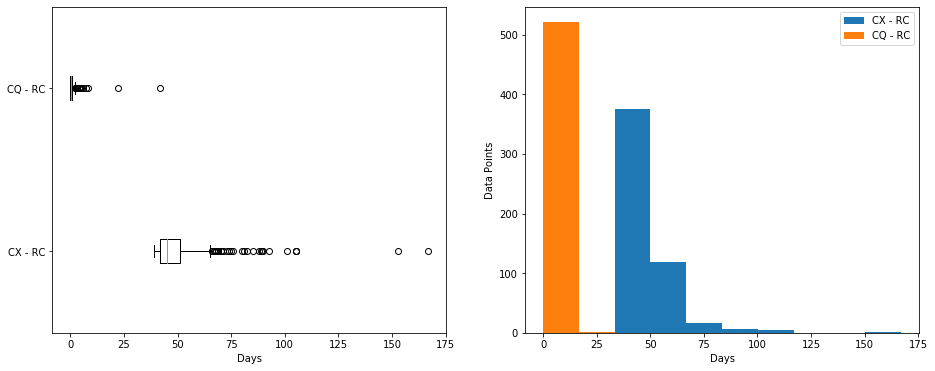

In [34]:
#Boxplot and histogram
data_CX = new_df['CX - RC']
data_RC = new_df['CQ - RC']
labels = ['CX - RC', 'CQ - RC']
plt.figure(figsize=(24,6))

#Boxplot
plt.subplot(131)
plt.boxplot([data_CX, data_RC], labels = labels, vert = False)
plt.xlabel('Days')

#Histogram
plt.subplot(132)
plt.hist([data_CX, data_RC], label = labels, stacked = True)
plt.xlabel('Days')
plt.ylabel('Data Points')
plt.legend()

plt.show()